**TASK-1**

DONE BY EEVANI BHARGAVI

TEST OUT SUPERVISED MACHINE LEARNING

AIM - Predict the percentage of a student based on the no. of study hours.


In this task, we predict the percentage score of the student based on the number of hours he/she studied by using the simple linear regression algorithm.

Data can be found at http://bit.ly/w-data. The dataset contains two variables- Hours indicating the number of hours a student studies and Scores indicating the percentage score he/she received by studying for the corresponding hours

**Importing the libraries that are required.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Let's read the data**

In [4]:
df=pd.read_csv('/content/Student_data.csv')
print("Data imported successfully!")

Data imported successfully!


In [5]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Getting the data Info**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.shape

(25, 2)

**Describing the data**

In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Checking for null values**

In [10]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**There are no null values. Hence, no data cleaning this required**

**Plotting the distribution of hours**

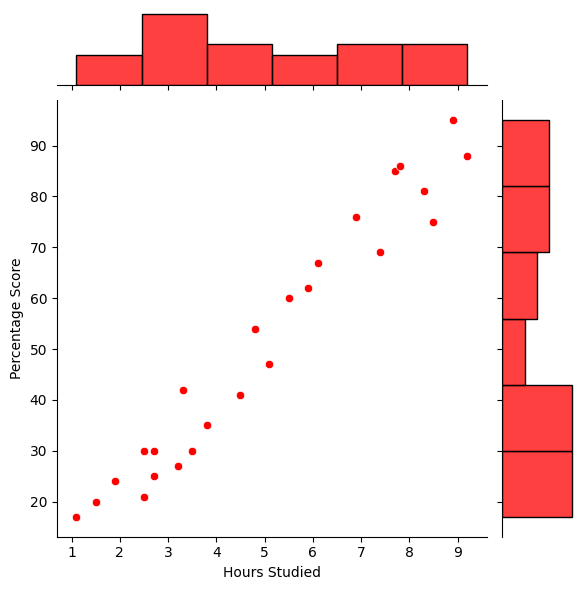

<Figure size 1000x1000 with 0 Axes>

In [11]:
sns.jointplot(data=df, x="Hours", y="Scores",color='r')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.figure(figsize=(10,10),dpi=100)
plt.show()

**Plotting Regressor plot to determine the relationship between feature and target variables**

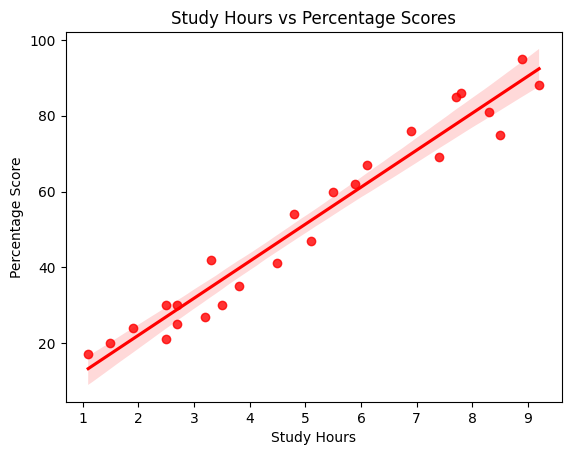

<Figure size 1500x1000 with 0 Axes>

In [12]:
sns.regplot(x=df['Hours'],y=df['Scores'],data=df,color='r')
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score')
plt.figure(figsize=(15,10),dpi=100)
plt.show()

**From the graph we have obtained, it can be seen that there is a positive linear relationship between our feature and target variables, i.e., Scores and Hours.**

**Preparing the input data to build our model**

Here we will separate the dataset variables into "input" or "attribute" or "feature" variables and "output" or "target" or "label" variables.

Since there were no null values and both the column data are numeric, data cleaning and manipulation was not required.

In [13]:
X = df.iloc[:,:1].values #features
y = df.iloc[:,-1].values #targets


**Training the algorithm**

We build our training and testing models

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
y_train

array([25, 42, 47, 35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86, 60, 85,
       17, 69, 88])

**Importing Linear Regression Algorithm from Sklearn**

In [15]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete")

Training complete


**Getting the Regression Coefficient and the intercept values to plot our graph**

In [16]:
print ("Coefficient: ", regressor.coef_)
print ("Intercept: ", regressor.intercept_)

Coefficient:  [9.68207815]
Intercept:  2.826892353899737


**Plotting our linear regression model**

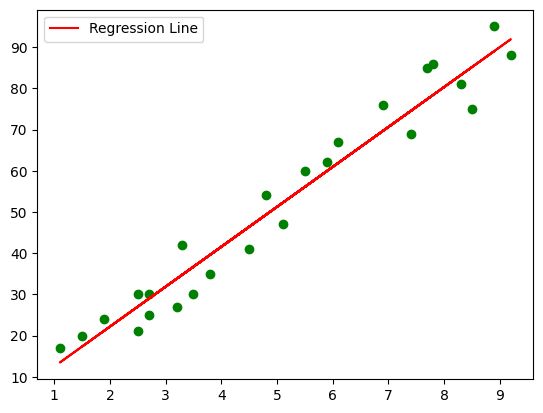

In [17]:
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, c='g')
plt.plot(X, line,color='red', label='Regression Line')
plt.legend()
plt.show()

In [18]:
y_pred = regressor.predict(X_test) # Predicting the scores in percentage

print("Hours Studied \t Percentage Scores\n")

for i in range(len(y_pred)):
    print("{} \t\t {}".format(X_test[i],y_pred[i].round(decimals=2)))

Hours Studied 	 Percentage Scores

[8.3] 		 83.19
[2.5] 		 27.03
[2.5] 		 27.03
[6.9] 		 69.63
[5.9] 		 59.95


In [19]:
#comparing the predictions from the actual data
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


We see that the predicted values are close to the actual values and can be used for approximate predictions

In [20]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9491209376364416
Test Score: 0.9678055545167994


**Visualizing the actual and predicted values**

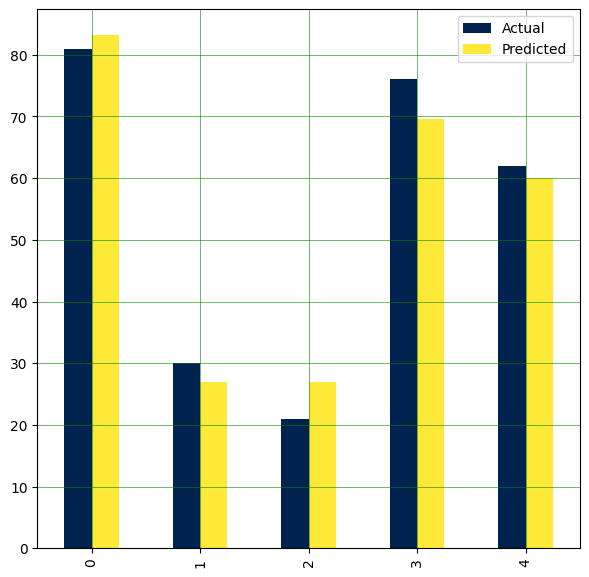

In [21]:
#plotting the grid to depict the actual and predicted value
data.plot(kind='bar',figsize=(7,7),colormap='cividis')
plt.grid(which='major', linewidth='0.4', color='green')
plt.grid(which='minor', linewidth='0.4', color='black')
plt.show()

**Predicting the score if hours=9.25**

In [22]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


**Evaluating our model**

In [23]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994


Here, we can conclude the accuracy of our model is 96.78%

**THANK YOU**